In [2]:
import numpy as np
import matplotlib.pyplot as plt

##############################################################

def angle(x1,x2): 
    # function to compute "angle" of line between two points, including collinearity with x2
    # In particular where x1=x2 set value to be (small_number)*(y1-y2) (so y sorted but near 0)
    # where y1=y2 set value to be (large_number)/(x1-x2) (so inverse x sorted and most negative overall)
    # This gives appropriate sorting order
    
    igrad = (x2[0]-x1[0])/(x2[1]-x1[1]+1.e-16)
    
    return np.where(x1[1]!=x2[1],
                    np.where(x1[0]!=x2[0], igrad, 1.e-16*(x1[1]-x2[1])),
                    1.e16/(x1[0]-x2[0]+1.e-16)) # eps prevents /0 and orders x2 last
##############################################################

def angle_simple(x1,x2): # Does not catch edge cases
    return (1.e-16+x2[0]-x1[0])/(x2[1]-x1[1]+1.e-32) # eps prevents /0 and orders x2 last
##############################################################

def cross(x1,x2,x3): # function to compute the vector product of vector (x2-x1) and (x3-x1) 
    return (x2[0] - x1[0])*(x3[1] - x1[1]) - (x2[1] - x1[1])*(x3[0] - x1[0])

##############################################################

def get_hull(points):
    
    # Find the bottom right point to start from (only need rightmost if colinear)
    ip0 =  np.argmin(points[1,:])
    ip0 = np.where((points[1,:] == points[1,ip0])*(points[0,:] == np.max(points[0,points[1,:]==points[1,ip0]])))[0][0]
                    
    sg = angle(points[:,:],points[:,ip0]) # Find the "inv gradient" of all points w.r.t the first  
    isp = np.argsort(sg)                  # Sort these
                                          # Start the hull with lowest and the largest angle from it
    hull = np.array([[points[0,ip0],points[0,isp[0]]],[points[1,ip0],points[1,isp[0]]]])
    
    for i in isp[1:-1]:                                           # loop over ordered points        
        hull = np.append(hull,points[:,i].reshape(2,1),axis=1)    # temporarily add the next point
        cr = cross(hull[:,-3],hull[:,-2],hull[:,-1])              # find the vector product (turning angle)

        while(cr>-3.e-16 and np.size(hull[0,:])>3):# for left turns (cr>0) or collinear cr==0 remove and repeat
            hull = np.delete(hull,-2,axis=1)                    
            cr = cross(hull[:,-3],hull[:,-2],hull[:,-1])
    return hull

##############################################################
    


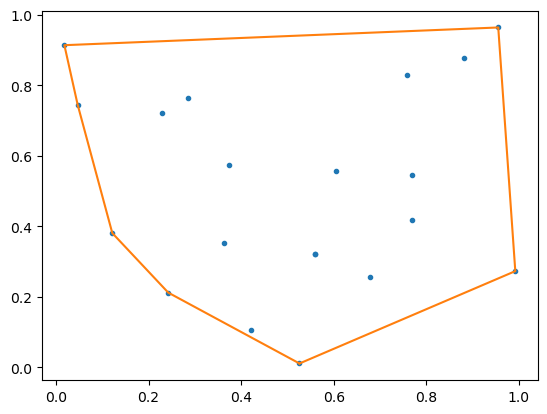

7

In [3]:
### BEGIN HIDDEN TESTS
import numpy as np
import matplotlib.pyplot as plt

nbg_score = 0

from scipy.spatial import ConvexHull

def get_hull_symp(points):  # This code extracts the scipy convex hull in the correct format for comparison
    pts = points.transpose()
    hull_symp = ConvexHull(pts)
    ip = list(set(hull_symp.simplices[:,0])|set(hull_symp.simplices[:,1]))
    return points[:,ip]

N = 20
points = np.random.rand(2,N)
hull = get_hull(points)
hullTest = get_hull_symp(points)

if(type(hull)==type(points)):   # first check the type is correct
    nbg_score += 1
else:
    print('hull output does not have the correct type')
    # attempt a conversion
    hull = np.array(hull)

if(np.shape(hull) == np.shape(hullTest)):  # important that the hull is the correct size and shape
    nbg_score += 2
else:
    print('hull output does not have the correct shape or size')
    print(np.shape(hull),np.shape(hullTest))
    # attempt a reshape
    if(np.size(hull)!=np.size(hullTest)):
        print('wrong number of points in the hull')
    else:
        hull = hull.reshape(np.shape(hullTest))  # we can reshape if the data is simply not laid out correctly

ip0 = np.argmin(points[1,:])
if (hull[:,0]==points[:,ip0]).all():
    nbg_score += 1
else:
    print('hull does not begin with lowest point')

if ((set(hull[0])==set(hullTest[0])) and (set(hull[1])==set(hullTest[1]))):
    nbg_score += 2
else:
    print('hull does not recover correct points')
    
plt.plot(points[0,:],points[1,:],'.')
plt.plot(np.append(hull[0,:],hull[0,0]),np.append(hull[1,:],hull[1,0]))
plt.show()

# Final weaker test with N=3 (hull=points)
points = np.random.rand(2,3)
hull3 = get_hull(points)
if ((set(hull3[0])==set(points[0])) and (set(hull3[1])==set(points[1]))):
    nbg_score += 1
else:
    print('get_hull should return all points when N=3!')
    
nbg_score

### END HIDDEN TESTS